## Introduction: 

    This project mainly focuses on the accidents occurred in the United States over the period of 4 years for 
    June 2016 - June 2020. The purpose is to perform EDA and analyze the data using machine learning techniques 
    to further draw conclusions. 
    
    

In [1]:
#import all the necessary libraries for data mining and visualization.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [2]:
df = pd.read_csv ('US_Accidents_June20.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


### Feature Description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

> > ## Performing EDA 

In [4]:
# make a new dataframe with some of the most interesting columns. 

accidents = df[['Start_Time','End_Time','State','City', 'County', 'Zipcode','Severity','Weather_Condition','Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop','Sunrise_Sunset']]

Text(0.5, 1.0, 'US Traffic Accidents by State (2016-2020)')

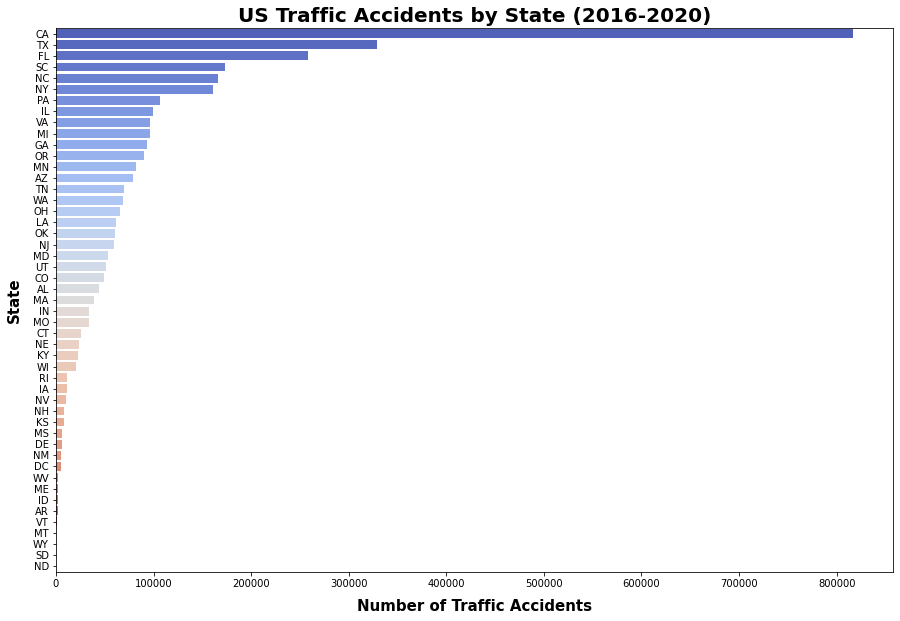

In [5]:
# plot the accidents by States. 

plt.figure(figsize=(15,10))
states = sns.countplot(y = 'State', data = accidents, order = accidents['State'].value_counts().index, palette='coolwarm')
plt.ylabel("State", labelpad=10, fontsize=15, weight = 'bold')
plt.xlabel('Number of Traffic Accidents', labelpad=10,fontsize=15, weight='bold')
plt.title('US Traffic Accidents by State (2016-2020)',fontsize=20, weight='bold')

    - California has the highest number of accidents.
    
    
### What about New York? 

    Let's find out by mining the data grouped by cities in NY.

In [6]:
# group by cities in NY.
accidents['Start_Time'] = pd.to_datetime(accidents['Start_Time'])
accidents['End_Time'] = pd.to_datetime(accidents['End_Time'])

accidents_NY = accidents[accidents["State"] == 'NY']
accidents_NY['City'].value_counts().head(15)
top15_NY = pd.DataFrame(accidents_NY['City'].value_counts().head(15))

<ipython-input-6-78fef9840e2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['Start_Time'] = pd.to_datetime(accidents['Start_Time'])
<ipython-input-6-78fef9840e2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['End_Time'] = pd.to_datetime(accidents['End_Time'])


Text(0.5, 1.0, 'Top Traffic Accidents for NY Cities')

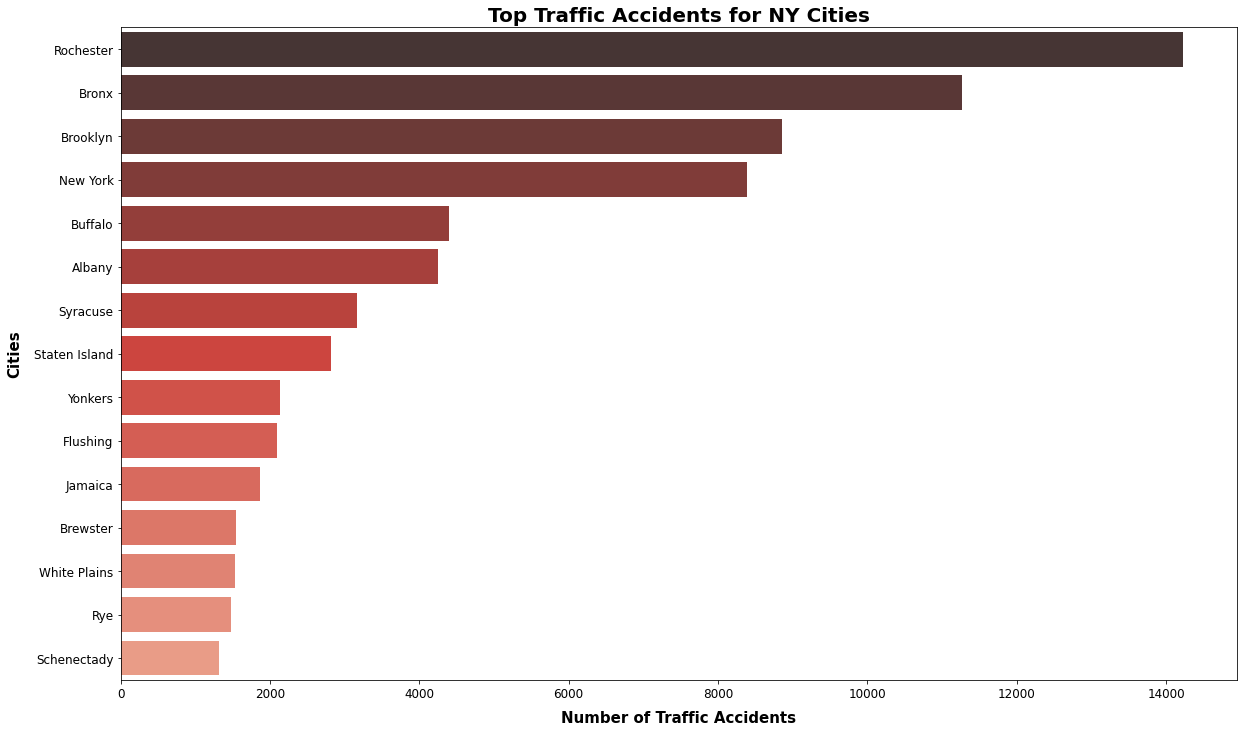

In [21]:

plt.figure(figsize=(20,12))
sns.barplot(top15_NY['City'],top15_NY.index, palette = "Reds_d")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Number of Traffic Accidents", labelpad = 10, fontsize=15,weight='bold')
plt.ylabel("Cities", labelpad = 12,fontsize=15, weight='bold')
plt.title("Top Traffic Accidents for NY Cities", fontsize=20,weight='bold')


    We can also notice there is "Sunrise_Sunset" column. Let's take a glance at it.

In [8]:
accidents_NY['Sunrise_Sunset'].value_counts()

Day      120055
Night     40735
Name: Sunrise_Sunset, dtype: int64

    We can use this for 

Text(0.5, 1.0, 'Traffic Accidents Percentages in NY')

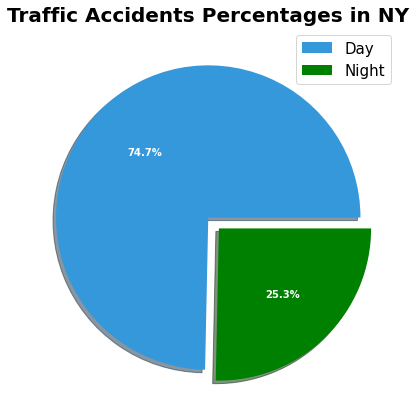

In [9]:
plt.figure(figsize = (10,7))
daynight = plt.pie(accidents_NY['Sunrise_Sunset'].value_counts(),autopct='%1.1f%%',shadow = True, explode = (0,0.1), colors = ['#3498db','green'], textprops=dict(color="w",weight = 'bold'))
plt.legend(['Day','Night'], loc="best",prop={'size': 15})
plt.title('Traffic Accidents Percentages in NY',fontsize=20,weight='bold')

Text(0.5, 1.0, 'Traffic Accidents Percentages in US')

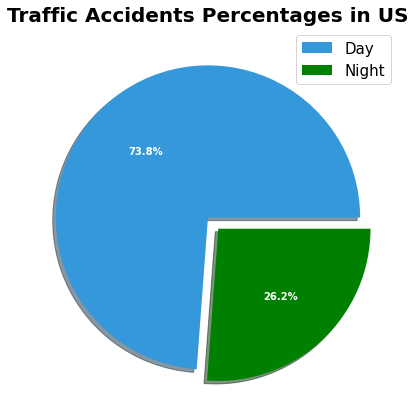

In [10]:
plt.figure(figsize = (10,7))
daynight = plt.pie(df['Sunrise_Sunset'].value_counts(),autopct='%1.1f%%',shadow = True, explode = (0,0.1), colors = ['#3498db','green'], textprops=dict(color="w",weight = 'bold'))
plt.legend(['Day','Night'], loc="best",prop={'size': 15})
plt.title('Traffic Accidents Percentages in US',fontsize=20,weight='bold')

In [22]:
df['Sunrise_Sunset'].head()

0    Night
1    Night
2    Night
3    Night
4      Day
Name: Sunrise_Sunset, dtype: object

In [11]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [12]:
df['Start_Time']
print(pd.DatetimeIndex(df['Start_Time']).hour)


Int64Index([ 5,  6,  6,  7,  7,  7,  7,  7,  8,  8,
            ...
            17, 17, 17, 17, 18, 18, 19, 19, 19, 18],
           dtype='int64', name='Start_Time', length=3513617)


In [13]:
#using Datetimeindex to add month column and hour
df['Month']=pd.DatetimeIndex(df['Start_Time']).month
df['Hour']=pd.DatetimeIndex(df['Start_Time']).hour

In [14]:
df['Severity'].value_counts()

2    2373210
3     998913
4     112320
1      29174
Name: Severity, dtype: int64

In [15]:
#getting a dataframe as per the new data 

df_severity = pd.DataFrame(data=df,columns=['Hour','Month','Severity'])

In [16]:
df_severity.head()

,Hour,Month,Severity
0,5,2,3
1,6,2,2
2,6,2,2
3,7,2,3
4,7,2,2


In [17]:
#getting df_severity as a result of  i.e. getting cases of 'Fatal Accidents' only.

df_severity = df_severity[df_severity.Severity ==1]

In [18]:
df_severity.head()

,Hour,Month,Severity
163,17,2,1
374,7,2,1
960,23,6,1
1390,9,6,1
7851,10,12,1


<AxesSubplot:>

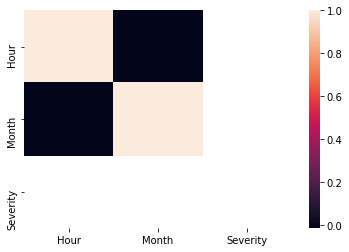

In [19]:
sns.heatmap(df_severity.corr())

### Let's compare the severity levels with some plots

In [20]:
#getting df_severity for all the rest of the severity levels.
# sort by categorical and ascending orders of the goods. 
df['Severity'] = pd.Categorical(df['Severity'],categories=['1','2','3','4'],ordered=True)
df


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Month,Hour
0,A-1,MapQuest,201.0,NaN,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,Night,Night,Night,Night,2,5
1,A-2,MapQuest,201.0,NaN,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,Night,Night,Night,Day,2,6
2,A-3,MapQuest,201.0,NaN,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,True,False,Night,Night,Day,Day,2,6
3,A-4,MapQuest,201.0,NaN,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,Night,Day,Day,Day,2,7
4,A-5,MapQuest,201.0,NaN,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,True,False,Day,Day,Day,Day,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,NaN,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,...,False,False,False,False,Day,Day,Day,Day,8,18
3513613,A-3513777,Bing,NaN,NaN,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,...,False,False,False,False,Day,Day,Day,Day,8,19
3513614,A-3513778,Bing,NaN,NaN,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,...,False,False,False,False,Day,Day,Day,Day,8,19
3513615,A-3513779,Bing,NaN,NaN,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,...,False,False,False,False,Day,Day,Day,Day,8,19
